In [2]:
# Importing pandas and seaborn libraries for data manipulation and charting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Import data from CSV file
# data = pd.read_csv('churn_clean.csv')
data = pd.read_csv('telecommunication_customer_churn.csv')

In [5]:
# Function to clean column names
def column_name_remove_space(df):
    for x in df.columns:
        if " " in x:
            df = df.rename(columns={x:x.replace(" ","_").replace("(","")
                                    .replace(")","").replace(",","_").replace("/","_")})
    return df


In [6]:
# Creating a copy of the data frame to be used to
# correlate unpsuprvised learning labels with existing categorical variables
data_orig = data.copy()

In [7]:

# Following data columns are not important for data analysis (more details included in the report)
to_drop = ['City','County','Zip','Job','TimeZone',
          'Lat','Lng','UID', 'Customer_id','Interaction','CaseOrder','State','Gender',
          'Churn','Techie','Contract','Port_modem', 'Area','Tablet','Phone',
           'OnlineSecurity','Multiple','OnlineBackup','TechSupport','DeviceProtection','StreamingTV',
          'StreamingMovies','PaperlessBilling','PaymentMethod','Marital','InternetService']
# Fix all columns
data = column_name_remove_space(data)
data.drop(columns=to_drop,inplace=True)

In [8]:
# Check for null values
data.isna().any(axis=0).any()

False

In [9]:
# Checking number of unique values in each column
data.nunique()

Population               5933
Children                   11
Age                        72
Income                   9993
Outage_sec_perweek       9986
Email                      23
Contacts                    8
Yearly_equip_failure        6
Tenure                   9996
MonthlyCharge             750
Bandwidth_GB_Year       10000
dtype: int64

In [10]:
# Check all the unique values for all the columns having less than 100 unique values
# Avoiding the value prints for those columns which have large number of unique values like zipcode or counties etc.

for col in data.columns:
    if data[col].nunique()<100:
        print(col, sorted(data[col].unique()), '\n')


Children [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 

Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89] 

Email [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23] 

Contacts [0, 1, 2, 3, 4, 5, 6, 7] 

Yearly_equip_failure [0, 1, 2, 3, 4, 6] 



In [11]:
# Check data by printing first few rows
data.head()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,38,0,68,28561.99,7.978323,10,0,1,6.795513,172.455519,904.536110
1,10446,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,800.982766
2,3735,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,2054.706961
3,13863,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,2164.579412
4,11352,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,271.493436


In [12]:
# Check data by printing last few rows
data.tail()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
9995,640,3,23,55723.74,9.415935,12,2,0,68.19713,159.9794,6511.252601
9996,77168,4,48,34129.34,6.740547,15,2,0,61.04037,207.4811,5695.951810
9997,406,1,48,45983.43,6.590911,10,0,0,47.41689,169.9741,4159.305799
9998,35575,1,39,16667.58,12.071910,14,1,0,71.09560,252.6240,6468.456752
9999,12230,1,28,9020.92,11.754720,17,1,0,63.35086,217.4840,5857.586167


In [13]:
# It is important to bring various columns or fields to the
# same scale because KMeans work based on distance between points
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(data)
scaled_data_array = sc.transform(data)
scaled_data = pd.DataFrame(scaled_data_array, columns = data.columns)
scaled_data.head()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,-0.673405,-0.972338,0.720925,-0.398778,-0.679978,-0.666282,-1.005852,0.946658,-1.048746,-0.003943,-1.138487
1,0.047772,-0.506592,-1.259957,-0.641954,0.570331,-0.005288,-1.005852,0.946658,-1.262001,1.630326,-1.185876
2,-0.417238,0.890646,-0.148730,-1.070885,0.252347,-0.996779,-1.005852,0.946658,-0.709940,-0.295225,-0.612138
3,0.284537,-0.506592,-0.245359,-0.740525,1.650506,0.986203,1.017588,-0.625864,-0.659524,-1.226521,-0.561857
4,0.110549,-0.972338,1.445638,0.009478,-0.623156,1.316700,1.017588,0.946658,-1.242551,-0.528086,-1.428184


In [14]:
# Export data to CSV for submission purposes
scaled_data.to_csv('scaled_data.csv')

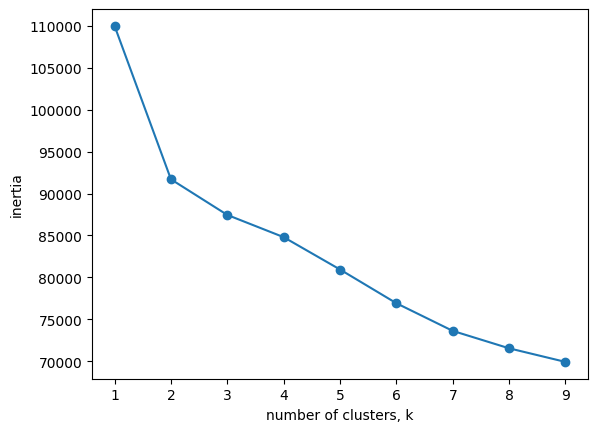

In [15]:
# Running KMeans models to create chart for elbow method

from sklearn.cluster import KMeans
ks = range(1, 10)    # varying cluster values from 1 to 10
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(scaled_data)
    inertias.append(model.inertia_)

# Plot ks vs inertias, to apply elbow method
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [16]:
# Based on elbow method, optimal number of clustering is 2
# Hence, creating KMeans model with 2 clusters for further analysis

model = KMeans(n_clusters=2)
model.fit(scaled_data)
print(model.labels_)

[1 1 1 ... 0 0 0]


In [17]:
# Print cluster centers
model.cluster_centers_

array([[ 3.79034614e-05, -3.57879072e-03,  1.93786294e-02,
         2.48055774e-03,  3.10380029e-03, -1.17669860e-02,
         4.04651440e-03,  8.93307937e-03,  9.60659818e-01,
        -1.78565915e-03,  9.52303242e-01],
       [-3.78883031e-05,  3.57735949e-03, -1.93708795e-02,
        -2.47956571e-03, -3.10255902e-03,  1.17622801e-02,
        -4.04489612e-03, -8.92950685e-03, -9.60275631e-01,
         1.78494503e-03, -9.51922397e-01]])

As previously stated, now we have cluster labels availables based on KMeans model run. We don't really know what those cluster labels correspond to in real world. To explore if the KMeans labels have some correspondence with the real world labels that we had in the original data, I am adding the KMeans labels to the original data and query the data to draw correspondence with other categorical variables (primarily the Churn variable).


In [18]:
# Creating a new column in the original data frame containing KMeans labels

data_orig['label_'] = model.labels_

In [19]:
# Exploring if KMeans labels have correlation with Churn field
print(data_orig.query('label_==0 and Churn=="Yes"').Customer_id.count())
print(data_orig.query('Churn=="Yes"').Customer_id.count())

284
2650


As we saw above, 2366 customers who had a churn values of Yes, were labeled under cluster 0 by KMeans.
There is strong correlation between cluster labeling and churn field values.
Based on this fact, we can assume that Kmeans is the predictive algorithm for Churn variable.
And we can compute the prediction accuracy.

In [20]:
# Under the assumption that the KMeans is being used as the predictive model for customer churn behavior
# we are not creating the confusion matrix

from sklearn import metrics
y_actual = data_orig['Churn'].apply(lambda x: 1 if x=='No' else 0)
y_pred = data_orig['label_']
metrics.confusion_matrix(y_actual, y_pred)

array([[ 284, 2366],
       [4715, 2635]], dtype=int64)

In [21]:
# And computing the accuracy score

metrics.accuracy_score(y_actual, y_pred)

0.2919

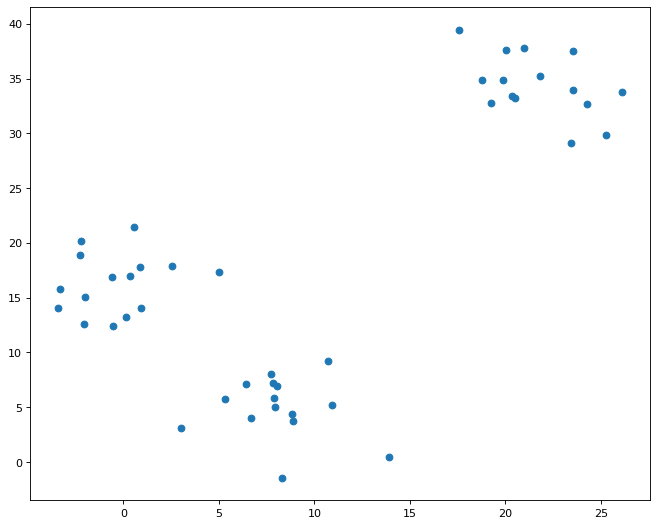

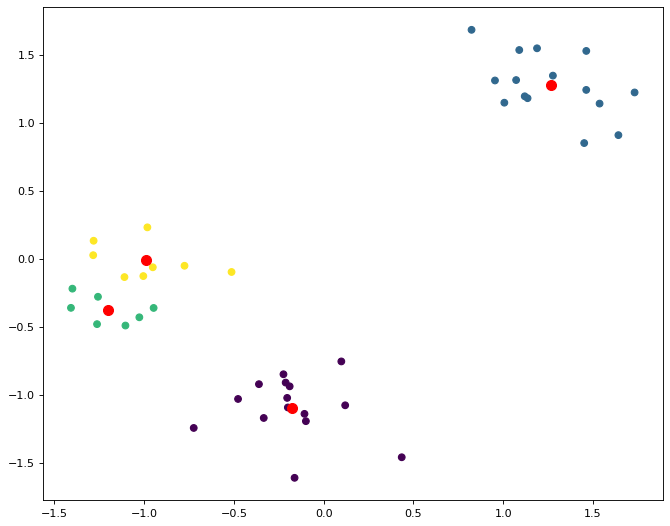

In [22]:
# This code is for the purpose of creating 2D charts to show how KMeans method works
# It is not pertinent to Customer data analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
plt.figure(figsize=(10, 8), dpi=80)
features, clusters = make_blobs(n_samples = 45,
                                center_box=(0,50),
                                n_features = 2,
                                cluster_std=3,
                                centers = 3,
                                shuffle = True,
                               random_state = 1)
plt.scatter(features[:,0], features[:,1])
plt.show()
df = pd.DataFrame(features, columns=["Feature 1", "Feature 2"])
sc = StandardScaler()
sc.fit(df)
scaled_data_array = sc.transform(df)
scaled_data = pd.DataFrame(scaled_data_array, columns = df.columns)

model = KMeans(n_clusters=4)
model.fit(scaled_data)
scaled_data['label'] = model.labels_
centroids = model.cluster_centers_
plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(scaled_data['Feature 1'], scaled_data['Feature 2'], c= model.labels_)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'r')
plt.show()

In [23]:
# Based on elbow method, optimal number of clustering is 2
# Hence, creating KMeans model with 2 clusters for further analysis

model = KMeans(n_clusters=2)
model.fit(scaled_data)
print(model.labels_)

[0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1
 0 1 1 1 1 1 0 0]


In [24]:
# Print cluster centers
model.cluster_centers_

array([[-1.08752477, -0.18099514,  2.53333333],
       [ 0.54376239,  0.09049757,  0.5       ]])

In [25]:
# Creating a new column in the original data frame containing KMeans labels

data_orig['label_'] = model.labels_

ValueError: Length of values (45) does not match length of index (10000)

In [26]:
# Exploring if KMeans labels have correlation with Churn field
print(data_orig.query('label_==0 and Churn=="Yes"').Customer_id.count())
print(data_orig.query('Churn=="Yes"').Customer_id.count())

284
2650


In [27]:
# Under the assumption that the KMeans is being used as the predictive model for customer churn behavior
# we are not creating the confusion matrix

from sklearn import metrics
y_actual = data_orig['Churn'].apply(lambda x: 1 if x=='No' else 0)
y_pred = data_orig['label_']
metrics.confusion_matrix(y_actual, y_pred)

array([[ 284, 2366],
       [4715, 2635]], dtype=int64)

In [28]:
# And computing the accuracy score

metrics.accuracy_score(y_actual, y_pred)

0.2919

In [29]:
# f1 score
from sklearn.metrics import f1_score

f1_score(y_actual, y_pred)

0.4266860982916363

In [30]:
# recall
from sklearn.metrics import recall_score

recall_score(y_actual, y_pred)

0.3585034013605442